Source: [towarddatascience](https://towardsdatascience.com/a-table-detection-cell-recognition-and-text-extraction-algorithm-to-convert-tables-to-excel-files-902edcf289ec)

In [189]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

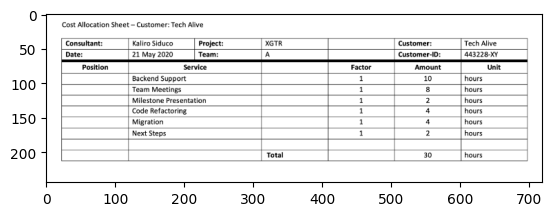

In [190]:
img = cv2.imread("sheet.png",0)
img.shape
plt.imshow(img, cmap="gray")

Text(0.5, 1.0, 'img_bin after invert')

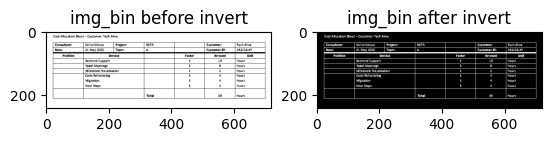

In [191]:
# thresholding the image to a binary image
thresh, img_bin = cv2.threshold(img, 128,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.subplot(1,2,1);plt.imshow(img_bin,cmap="gray");plt.title("img_bin before invert")
# Inverting the image
img_bin = 255-img_bin
plt.subplot(1,2,2);plt.imshow(img_bin,cmap="gray");plt.title("img_bin after invert")

In [192]:
# Length (width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100

# Defining a vertical kernel to detect all vertical lines of image
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(1,kernel_len))

# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(kernel_len,1))

# Create 2x2 kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))

print(f"ver_kennel:\n{ver_kernel}")
print(f"hor_kernel:\n{hor_kernel}")
print(f"Kernel:\n{kernel}")

ver_kennel:
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
hor_kernel:
[[1 1 1 1 1 1 1]]
Kernel:
[[1 1]
 [1 1]]


Text(0.5, 1.0, 'Original')

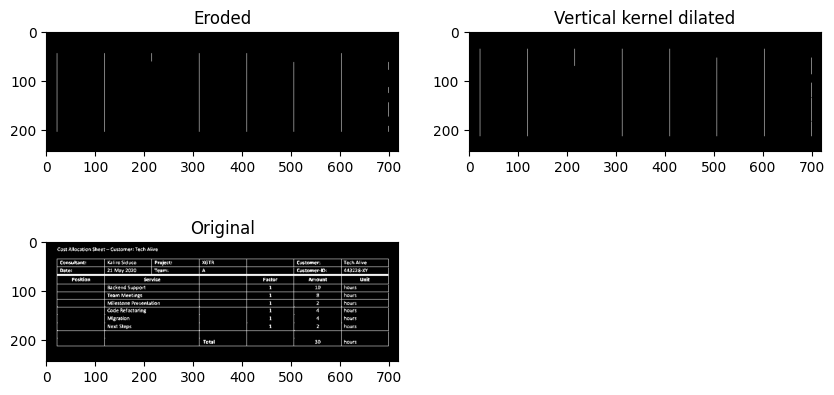

In [193]:
# Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
cv2.imwrite("horizontal.jpg", vertical_lines)

plt.figure(figsize=(10,5));
plt.subplot(2,2,1);plt.imshow(image_1, cmap="gray");plt.title("Eroded")
plt.subplot(2,2,2);plt.imshow(vertical_lines, cmap="gray");plt.title("Vertical kernel dilated")
plt.subplot(2,2,3);plt.imshow(img_bin, cmap="gray");plt.title("Original")

Text(0.5, 1.0, 'Original')

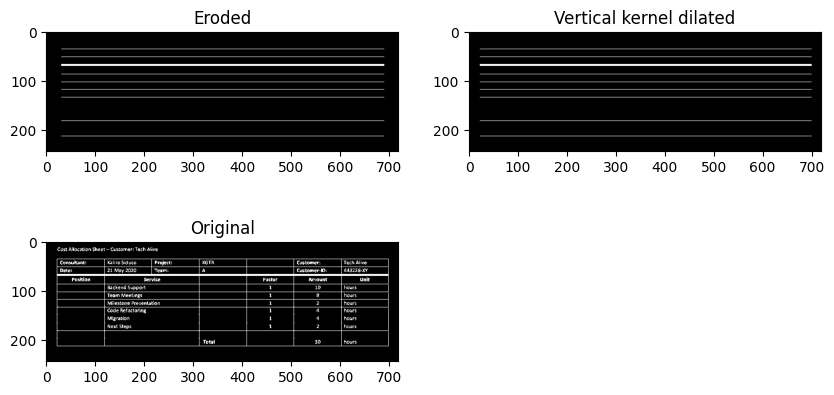

In [168]:
# Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
cv2.imwrite("horizontal.jpg",horizontal_lines)

plt.figure(figsize=(10,5));
plt.subplot(2,2,1);plt.imshow(image_2, cmap="gray");plt.title("Eroded")
plt.subplot(2,2,2);plt.imshow(horizontal_lines, cmap="gray");plt.title("Vertical kernel dilated")
plt.subplot(2,2,3);plt.imshow(img_bin, cmap="gray");plt.title("Original")

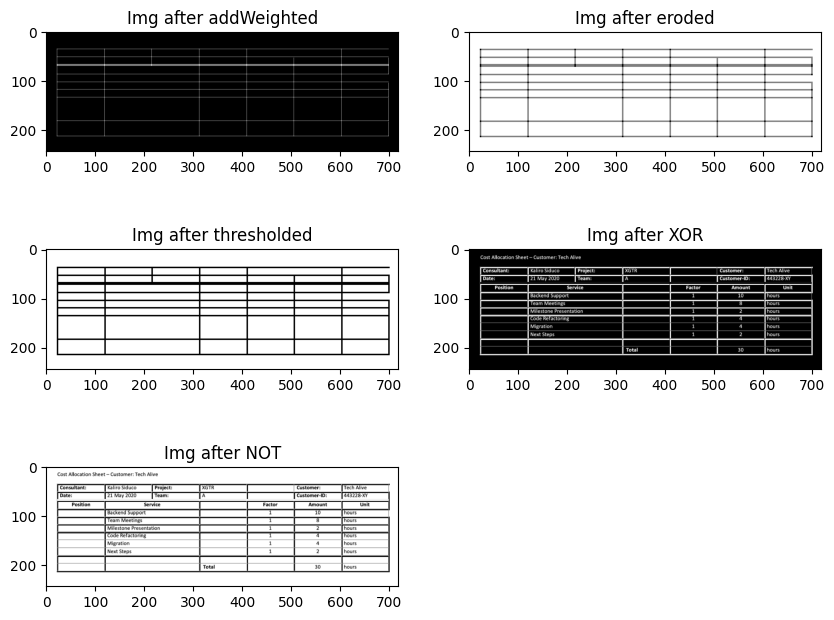

In [169]:
# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)

plt.figure(figsize=(10,8));
plt.subplot(3,2,1);plt.imshow(img_vh, cmap="gray");plt.title("Img after addWeighted");

# Eroding and thresholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)

plt.subplot(3,2,2);plt.imshow(img_vh, cmap="gray");plt.title("Img after eroded");

thresh, img_vh = cv2.threshold(img_vh, 128, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.subplot(3,2,3);plt.imshow(img_vh, cmap="gray");plt.title("Img after thresholded");

bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)

plt.subplot(3,2,4);plt.imshow(bitxor, cmap="gray");plt.title("Img after XOR");
plt.subplot(3,2,5);plt.imshow(bitnot, cmap="gray");plt.title("Img after NOT");


In [170]:
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [172]:
print(contours)

(array([[[  0,   0]],

       [[  0, 243]],

       [[719, 243]],

       [[719,   0]]], dtype=int32), array([[[ 21,  36]],

       [[ 22,  35]],

       [[700,  35]],

       [[701,  36]],

       [[701,  38]],

       [[700,  39]],

       [[605,  39]],

       [[605,  51]],

       [[700,  51]],

       [[701,  52]],

       [[701,  89]],

       [[700,  90]],

       [[605,  90]],

       [[605, 102]],

       [[700, 102]],

       [[701, 103]],

       [[701, 215]],

       [[700, 216]],

       [[ 22, 216]],

       [[ 21, 215]]], dtype=int32), array([[[605, 185]],

       [[605, 212]],

       [[697, 212]],

       [[697, 185]]], dtype=int32), array([[[508, 185]],

       [[508, 212]],

       [[601, 212]],

       [[601, 185]]], dtype=int32), array([[[412, 185]],

       [[412, 212]],

       [[504, 212]],

       [[504, 185]]], dtype=int32), array([[[315, 185]],

       [[315, 212]],

       [[408, 212]],

       [[408, 185]]], dtype=int32), array([[[122, 185]],

       [[122,

In [173]:
print(hierarchy)

[[[-1 -1  1 -1]
  [-1 -1  2  0]
  [ 3 -1 -1  1]
  [ 4  2 -1  1]
  [ 5  3 -1  1]
  [ 6  4 -1  1]
  [ 7  5 -1  1]
  [ 8  6 -1  1]
  [ 9  7 -1  1]
  [10  8 -1  1]
  [11  9 -1  1]
  [12 10 -1  1]
  [13 11 -1  1]
  [14 12 -1  1]
  [15 13 -1  1]
  [16 14 -1  1]
  [17 15 -1  1]
  [18 16 -1  1]
  [19 17 -1  1]
  [20 18 -1  1]
  [21 19 -1  1]
  [22 20 -1  1]
  [23 21 -1  1]
  [24 22 -1  1]
  [25 23 -1  1]
  [26 24 -1  1]
  [27 25 -1  1]
  [28 26 -1  1]
  [29 27 -1  1]
  [30 28 -1  1]
  [31 29 -1  1]
  [32 30 -1  1]
  [33 31 -1  1]
  [34 32 -1  1]
  [35 33 -1  1]
  [36 34 -1  1]
  [37 35 -1  1]
  [38 36 -1  1]
  [39 37 -1  1]
  [40 38 -1  1]
  [41 39 -1  1]
  [42 40 -1  1]
  [43 41 -1  1]
  [44 42 -1  1]
  [45 43 -1  1]
  [46 44 -1  1]
  [47 45 -1  1]
  [48 46 -1  1]
  [-1 47 -1  1]]]
